# Práctica 10: Evaluación de clasificadores 2024-25

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler

## Importancia de mezclar aleatoriamente

El conjunto de datos 'wisconsin_breast_cancer.csv' se ha ordenado por la columna 'diagnsosis' está ordenado de forma que todas las muestras pertenecientes a la misma clase se encuentran consecutivas.

Se puede comprobar que entrenar un clasificador sin mezclar las muestras aleatoriamente en este caso implica una peor rendimiento del clasificador.

In [3]:
df = pd.read_csv('datos/wisconsin_breast_cancer.csv')
# ordena por diagnosis
df = df.sort_values(by='diagnosis')

X = df.values[:,2:]
y = df.values[:,1]

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
284,8912284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,...,13.90,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127
371,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.11260,0.1737,0.1362,0.08178,0.2487,0.06766
367,9011495,B,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,...,14.29,24.04,93.85,624.6,0.13680,0.2170,0.2413,0.08829,0.3218,0.07470
364,9010877,B,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,...,14.73,21.70,93.76,663.5,0.12130,0.1676,0.1364,0.06987,0.2741,0.07582
363,9010872,B,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,...,18.13,25.45,117.20,1009.0,0.13380,0.1679,0.1663,0.09123,0.2394,0.06469


Resultado sin mezclar al hacer la partición train/test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=2468)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud sin reordenar: {exactitud*100:.1f}%')


Exactitud sin reordenar: 66.1%


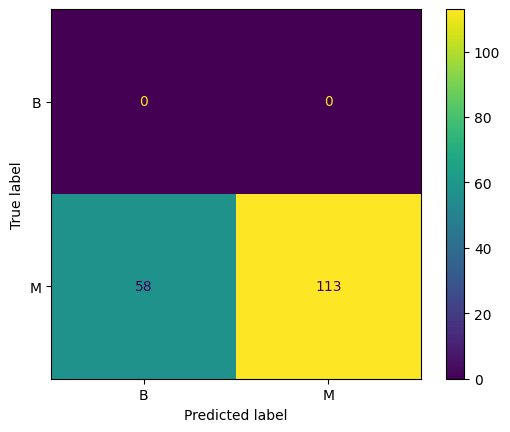

In [5]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [6]:
print(classification_report(y_test, y_pred, labels=clf.classes_))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00         0
           M       1.00      0.66      0.80       171

    accuracy                           0.66       171
   macro avg       0.50      0.33      0.40       171
weighted avg       1.00      0.66      0.80       171



/home/miguel/miniconda3/envs/aa1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/miguel/miniconda3/envs/aa1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/miguel/miniconda3/envs/aa1/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Resultado al mezclar al hacer la partición train/test y escalado lineal

Exactitud reordenando: 91.8%
              precision    recall  f1-score   support

           B       0.90      0.97      0.94       105
           M       0.95      0.83      0.89        66

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



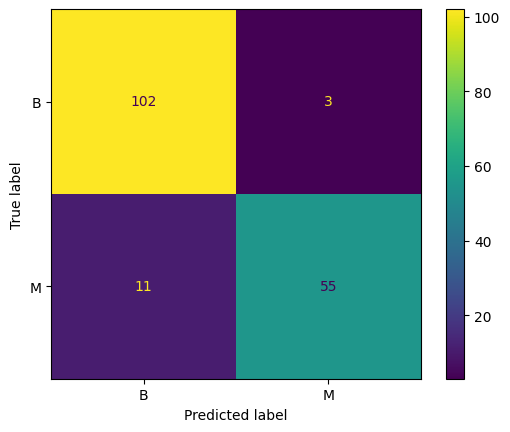

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=2468)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud reordenando: {exactitud*100:.1f}%')

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

print(classification_report(y_test, y_pred, labels=clf.classes_))

## Holdout repetición

Cuando se realiza la partición en train/test el resultado depende de la semilla y por tanto de la distribución de muestras en el train y test. Para ilustrarlo se hace una primera partición usando como semilla 2468 y luego 123 y se comparan los resultados que varían mucho.

La solución es generar varias particiones con diferentes semillas y obtener la media

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2468)

esc = MinMaxScaler()
X_train = esc.fit_transform(X_train)
X_test = esc.transform(X_test)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud SVC rbf: {exactitud*100:.1f}%') 

Exactitud SVC rbf: 98.2%


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

esc = MinMaxScaler()
X_train = esc.fit_transform(X_train)
X_test = esc.transform(X_test)

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud SVC rbf: {exactitud*100:.1f}%') 

Exactitud SVC rbf: 95.6%


In [10]:
semillas = np.random.randint(1,9999,size=10)
print(f'Semillas: {semillas}')
vector_exac = np.zeros(len(semillas))
esc = MinMaxScaler()

for idx, semilla in enumerate(semillas):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=semilla)
    X_train = esc.fit_transform(X_train)
    X_test = esc.transform(X_test)

    clf = SVC(kernel='rbf')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Exactitud SVC rbf semilla {semilla:4d}: {exactitud*100:.1f}%') 
    vector_exac[idx] = exactitud
print()
print(f'Exactitud promedio: {np.mean(vector_exac)*100:.1f}%')

Semillas: [4966 9100  615 8905 9394 9894  705 4133 4832 5383]
Exactitud SVC rbf semilla 4966: 96.5%
Exactitud SVC rbf semilla 9100: 99.1%
Exactitud SVC rbf semilla  615: 98.2%
Exactitud SVC rbf semilla 8905: 97.4%
Exactitud SVC rbf semilla 9394: 97.4%
Exactitud SVC rbf semilla 9894: 95.6%
Exactitud SVC rbf semilla  705: 99.1%
Exactitud SVC rbf semilla 4133: 96.5%
Exactitud SVC rbf semilla 4832: 97.4%
Exactitud SVC rbf semilla 5383: 99.1%

Exactitud promedio: 97.6%


Muy util para probar que tan bueno es mi clasificador para este conjunto de datos y que tan bueno es mi conjunto de datos

## Train, validación, test

Cuando un modelo posee hiperparámetros (p.e. núcleo o parámetro C de regularización en SVM, núm vecinos en KNN, núm. árbole random forest, ...), y se desea encontrar los valores óptimos no se debe hacer con el conjunto de test ya que este solo de debe utilizar en el último momento para estimar el rendimiento y no debe ser utilizado en ningún proceso previo como entrenamiento o ajuste de parámetros.

Divisón: train (70%), validación (15%), test(15%)

1. Ajuste hiperparámetros: Entrenar con train con diferentes hiperparámetros y comprobar rendimiento con validación -> mejores valores de hiperparámetros
2. Estimar rendimiento modelo: Entrenar con train+validación con mejores hiperparámetros y comprobar con test -> estimación rendimiento del modelo


In [11]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [12]:
df = pd.read_csv('datos/wisconsin_breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
X = df.values[:,2:]
y = df.values[:,1]
num_muestras = len(df)

Ajsute mejores hiperparámetros. P.e. parámetro de regularización C

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(num_muestras*0.15), random_state=2468)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=int(num_muestras*0.15), random_state=2468)

esc = MinMaxScaler()
X_train2 = esc.fit_transform(X_train2)
X_val = esc.transform(X_val)

mejor_C = None
mejor_acc = 0 
for c in [0.1, 1, 5, 10, 50]:
    clf = SVC(kernel='rbf', C=c)
    clf.fit(X_train2, y_train2)
    
    y_pred = clf.predict(X_val)
    exactitud = accuracy_score(y_val, y_pred)

    print(f'SVC rbf c={c}: {exactitud*100:.1f}%')
    if exactitud > mejor_acc:
        mejor_acc = exactitud
        mejor_C = c

print()
print(f'Mejor exactitud {mejor_acc*100:.1f} con C={mejor_C}') 

SVC rbf c=0.1: 91.8%
SVC rbf c=1: 96.5%
SVC rbf c=5: 98.8%
SVC rbf c=10: 98.8%
SVC rbf c=50: 100.0%

Mejor exactitud 100.0 con C=50


Entrenamos de nuevo el clasificador usando el mejor valor de C

In [15]:
X_train = esc.fit_transform(X_train)
X_test = esc.transform(X_test)

c=mejor_C

clf = SVC(kernel='rbf', C=c)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'SVC rbf c={c}: {exactitud*100:.1f}%')
print(classification_report(y_test, y_pred, labels=clf.classes_))

SVC rbf c=50: 100.0%
              precision    recall  f1-score   support

           B       1.00      1.00      1.00        55
           M       1.00      1.00      1.00        30

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



## Ajuste de hiperparámetros exhaustivo (Rejilla)

Cuando se deben ajustar más de un parámetro. P.e. núcleo y parámetro de regularización se pueden probar todos los pares posibles como si de una rejilla se tratase

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(num_muestras*0.15), random_state=2468)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=int(num_muestras*0.15), random_state=2468)

esc = MinMaxScaler()
X_train2 = esc.fit_transform(X_train2)
X_val = esc.transform(X_val)

In [17]:
mejor_C = None
mejor_nucleo = None
mejor_acc = 0 
for nucleo in ['rbf', 'rbf', 'poly']:
    for c in [0.1, 1, 5, 10, 50]:
        clf = SVC(kernel=nucleo, C=c)
        clf.fit(X_train2, y_train2)

        y_pred = clf.predict(X_val)
        exactitud = accuracy_score(y_val, y_pred)

        print(f'SVC nucleo {nucleo} c={c}: {exactitud*100:.1f}%')
        if exactitud > mejor_acc:
            mejor_acc = exactitud
            mejor_C = c
            mejor_nucleo = nucleo

print()
print(f'Mejor exactitud {mejor_acc*100:.1f} con nucleo={mejor_nucleo} y C={mejor_C}')             

SVC nucleo rbf c=0.1: 91.8%
SVC nucleo rbf c=1: 96.5%
SVC nucleo rbf c=5: 98.8%
SVC nucleo rbf c=10: 98.8%
SVC nucleo rbf c=50: 100.0%
SVC nucleo rbf c=0.1: 91.8%
SVC nucleo rbf c=1: 96.5%
SVC nucleo rbf c=5: 98.8%
SVC nucleo rbf c=10: 98.8%
SVC nucleo rbf c=50: 100.0%
SVC nucleo poly c=0.1: 96.5%
SVC nucleo poly c=1: 97.6%
SVC nucleo poly c=5: 97.6%
SVC nucleo poly c=10: 97.6%
SVC nucleo poly c=50: 96.5%

Mejor exactitud 100.0 con nucleo=rbf y C=50


In [18]:
X_train = esc.fit_transform(X_train)
X_test = esc.transform(X_test)

c=mejor_C
nucleo = mejor_nucleo

clf = SVC(kernel=nucleo, C=c)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)

print(f'SVC nucleo={nucleo} c={c}: {exactitud*100:.1f}%')
print(classification_report(y_test, y_pred, labels=clf.classes_))

SVC nucleo=rbf c=50: 100.0%
              precision    recall  f1-score   support

           B       1.00      1.00      1.00        55
           M       1.00      1.00      1.00        30

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



## Validación cruzada

Cuando el número de muestras no es elevado al hacer una partición train/test puede ocurrir que se usen pocas muestras para test o si se aumentan el número de éstas, se reduce el número de muestras para el entrenamiento.

En el holdout repetido, las muestras se repiten en el conjunto de train y de test.

Para solucionar esta situación se utiliza la validación cruzada, donde todas las muestras intervienen en el entrenamiento y en el test

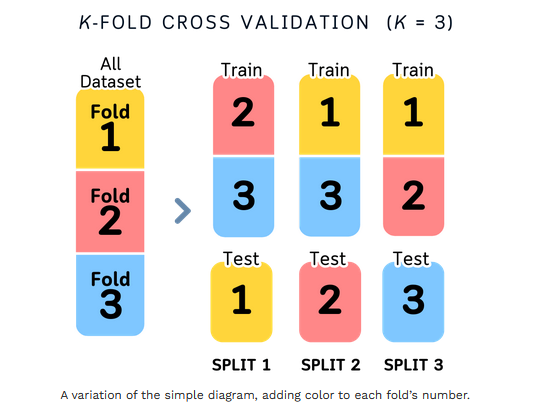

In [19]:
X = list(range(1,21))
y = list(range(1,21))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(X_train, X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(X_train, X_test)

[4, 8, 11, 5, 12, 6, 15, 10, 9, 19, 16, 17] [20, 2, 1, 3, 18, 13, 7, 14]
[8, 14, 5, 15, 18, 7, 1, 19, 2, 11, 17, 10] [4, 20, 13, 16, 9, 12, 6, 3]


La clase KFold en el paquete model_selection permite obtener las particiones según la validación cruzada

In [20]:
from sklearn.model_selection import KFold

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=2468)

for train_idx, test_idx in kf.split(X):
    print(f'Muestras train: {train_idx}')
    print(f'Muestras test: {test_idx}')
    print()

Muestras train: [ 0  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19]
Muestras test: [ 1  3  7 14]

Muestras train: [ 1  2  3  4  6  7  8  9 10 11 12 14 15 16 17 19]
Muestras test: [ 0  5 13 18]

Muestras train: [ 0  1  2  3  4  5  6  7 11 12 13 14 15 17 18 19]
Muestras test: [ 8  9 10 16]

Muestras train: [ 0  1  2  3  5  7  8  9 10 13 14 15 16 17 18 19]
Muestras test: [ 4  6 11 12]

Muestras train: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 16 18]
Muestras test: [ 2 15 17 19]



In [22]:
df = pd.read_csv('datos/wisconsin_breast_cancer.csv')
X = df.values[:,2:]
y = df.values[:,1]
num_muestras = len(df)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=2468)

lista_acc = []
for train_idx, test_idx in kf.split(X):
    # print(f'Partición fold: {train_idx} {test_idx}')

    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y [test_idx]

    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    exactitud = accuracy_score(y_test, y_pred)
    print(f'Exactitud SVC: {exactitud*100:.1f}%')

    lista_acc.append(exactitud)

print()
print(f'Exactitud promedio: {np.mean(lista_acc)*100:.1f}%')

Exactitud SVC: 99.1%
Exactitud SVC: 93.9%
Exactitud SVC: 94.7%
Exactitud SVC: 96.5%
Exactitud SVC: 94.7%

Exactitud promedio: 95.8%


El paquete model_selection también incluye la función cross_validate que realiza el proceso anterior además de poder indicar qué medida de rendimiento se desea utilizar. Se debe pasar como argumento, el clasificador (o regresor), las características X, la clase. Por defecto hace cv=5 y la medida de rendimiento la definida por defecto para el clasificador aunque mediante el argumento scoring se le puede indicar una o más.

Devuelve un diccionario con los tiempos de ejecución, y la medida de rendimiento para cada partición.

In [36]:
from sklearn.model_selection import cross_validate

clf = SVC(kernel='linear')

resultado = cross_validate(clf, X, y, cv=5) # CV = tu número de folds
# Que te devuelve?
print(type(resultado))
print(resultado.keys())
########################
for key in resultado.keys():
    print(f'{key}: {resultado[key]}')
print()
print(f'Exactitud: {np.mean(resultado["test_score"])*100:.1f}')

<class 'dict'>
dict_keys(['fit_time', 'score_time', 'test_score'])
fit_time: [0.57509732 0.65608501 0.47000837 0.43156481 0.37153697]
score_time: [0.00064588 0.00071001 0.00079703 0.00070095 0.00069022]
test_score: [0.94736842 0.92982456 0.97368421 0.92105263 0.95575221]

Exactitud: 94.6


Para obtener más de una medida de rendimiento se pasa una lista al argumento scoring. En este caso el resultado será un diccionario con tantos "test_" como medidas se hayan indicado

IMPORTANTE: Para poder usar recall y precision debe usarse un problema biclásico y convertir las etquietas a binario mediante la transformación LabelBinarizer del paquete preprocessing

In [25]:
from sklearn.preprocessing import LabelBinarizer

In [38]:
lb = LabelBinarizer()
y_binaria = lb.fit_transform(y).reshape(-1)

clf = SVC(kernel='rbf')

resultado = cross_validate(clf, X, y_binaria, cv=10, scoring=['accuracy',  'recall', 'precision'])
print(f'Resultado: {resultado.keys()}')
print(f'Exactitud: {np.mean(resultado["test_accuracy"])*100:.1f}')
print(f'Sensibilidad: {np.mean(resultado["test_recall"])*100:.1f}')
print(f'Precision: {np.mean(resultado["test_precision"])*100:.1f}')


Resultado: dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_recall', 'test_precision'])
Exactitud: 91.4
Sensibilidad: 80.8
Precision: 95.8


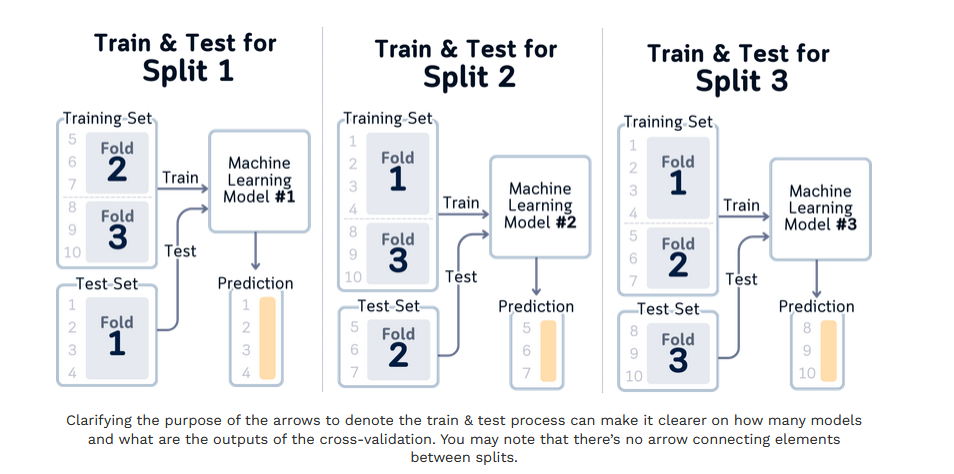

#### IMPORTANTE!!!!!!!!!!!!

La utilidad de esto es elegir varios modelos diferentes (SVC, KNN...) y hacer el proceso de cross validation para cada uno de ellos con el mismo número de K. Eliges el que tiene mayor rendimento promedio y ese es el que entrenas con todos los datos y evaluas.

## Ajuste parámetros mediante GridSearchCV y RandomizedSearchCV

Sklearn ya dispone de una función que permite ajustar los parámetros exhaustiva (grid) usando como estimación la validación cruzada.

Como argumentos tiene el modelo y un diccionario con los hiperparámetros que se van a ajustar y el conjunto de valores para cada uno de ellos.

Se le debe pasar X_train e y_train, ya que en cada ejecución de la validación cruzada una partición es la de validación y el resto de train.

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
df = pd.read_csv('datos/wisconsin_breast_cancer.csv')
X = df.values[:,2:]
y = df.values[:,1]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2468)

In [ ]:
params = {'C': [0.1,1,5,10], 'kernel': ['linear', 'rbf', 'poly']}

svc = SVC()
clf = GridSearchCV(svc, params)
clf.fit(X_train, y_train)

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
{'C': 10, 'kernel': 'linear'}


In [46]:
print(clf.cv_results_.keys())
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
{'C': 10, 'kernel': 'linear'}
0.9544458762886597
SVC(C=10, kernel='linear')


In [47]:
best_model = clf.best_estimator_
y_pred = best_model.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud: {exactitud*100:.1f}%')
print(classification_report(y_test, y_pred, labels=best_model.classes_))

Exactitud: 98.8%
              precision    recall  f1-score   support

           B       0.98      1.00      0.99        55
           M       1.00      0.97      0.98        31

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



El mejor conjunto de parámetros se obtiene en la variable de la clase best_params_

In [31]:
print(f'Mejores valores de hiperparámetros: {clf.best_params_}')

svc = SVC(kernel=clf.best_params_['kernel'], C=clf.best_params_['C'])
svc.fit(X_test, y_test)

y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)

print(f'Exactitud conjunto test: {exactitud*100:.1f}%')

Mejores valores de hiperparámetros: {'C': 10, 'kernel': 'linear'}
Exactitud conjunto test: 98.8%


Cuando el número de combinaciones de los hyperparámetros es muy grande, la búsqueda grid puede llevar mucho tiempo en ese caso se puede utilizar la RandomizedSearchCV que aleatoriamente prueba un número determinado de combinaciones y devuelve la mejor de las mismas

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
params = {'C': [0.1,1,5,10], 'kernel': ['linear', 'rbf']}

svc = SVC()
clf = RandomizedSearchCV(svc, params, n_iter=3)
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=3,
                   param_distributions={'C': [0.1, 1, 5, 10],
                                        'kernel': ['linear', 'rbf']})

In [50]:
print(clf.cv_results_.keys())
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
{'kernel': 'linear', 'C': 5}
0.9523840206185566
SVC(C=5, kernel='linear')


Claro, aquí te lo dejo mejorado, corrigiendo errores de redacción y dándole un tono más claro y motivador:

---

## Ejercicio

La mejor forma de practicar estos conceptos es enfrentarte a problemas reales. Como ya tienen experiencia en aprendizaje automático, van a elegir **un dataset** de alguna de las siguientes fuentes:

* [UCI Machine Learning Repository](https://archive.ics.uci.edu/)
* [Kaggle](https://www.kaggle.com/#)

El objetivo es **encontrar el mejor clasificador posible** entre los que hemos estudiado en clase, aplicando además las técnicas que hemos aprendido hoy.

Siempre en ML el objetivo es contestar a estas cuestiones:
- Qué dataset elegiste y por qué.
- Qué clasificadores probaste y cómo los comparaste.
- Qué métricas usaste para evaluar el rendimiento.
- Qué técnicas adicionales aplicaste para mejorar los resultados.
- Cuál fue tu modelo final y por qué lo consideras el mejor.